In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
from random import randint 
import random 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, plot_confusion_matrix, roc_auc_score, confusion_matrix
from imblearn.metrics import geometric_mean_score
import sklearn.metrics
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn import metrics

In [2]:
#from orion.contrib.envs import load_env
#load_env()
import boto3
#from orion.sources import S3Source
aws_bucket = 'kilimanjaro-prod-datalake'
s3 = boto3.client('s3')

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
import swim_maha
swim_maha.SwimMaha()

In [5]:
import mahakil_update as mahakil
mahakil.MAHAKIL()

In [6]:
wine_white = pd.read_csv('winequality-white.csv', delimiter=';')
wine_red = pd.read_csv('winequality-red.csv', delimiter=';')

In [7]:
# White Wine Quality Low vs High
WineWLvH = deepcopy(wine_white)
WineWLvH = WineWLvH[(WineWLvH['quality'] <5)| (WineWLvH['quality'] >6)]
WineWLvH.loc[WineWLvH.quality >= 7, "class"] = 0
WineWLvH.loc[WineWLvH.quality <= 4, "class"] = 1
WineWLvH['class'] = WineWLvH['class'].astype("int")
WineWLvH['class'] = WineWLvH['class'].astype("category")
WineWLvH = WineWLvH.drop(columns=['quality'])
print(WineWLvH['class'].value_counts())
WineWLvH.name = 'D10 - Wine_white_LvH'

0    1060
1     183
Name: class, dtype: int64


In [8]:
wine_red['quality'].value_counts().sort_index(ascending=False)

8     18
7    199
6    638
5    681
4     53
3     10
Name: quality, dtype: int64

In [9]:
# Low Quality Red Wine (3,4)
WineT = deepcopy(wine_red)
WineT["class"] = ""
WineT.loc[WineT.quality >= 7, "class"] = 1
WineT.loc[WineT.quality == 6, "class"] = 0
WineT.loc[WineT.quality == 5, "class"] = 0
WineT.loc[WineT.quality <= 4, "class"] = 2
WineT['class'] = WineT['class'].astype("category")
WineT = WineT.drop(columns=['quality'])
WineT.name = 'Wine test'
WineT['class'].value_counts()

0    1319
1     217
2      63
Name: class, dtype: int64

In [10]:
# Low Quality Red Wine (3,4)
WineRL = deepcopy(wine_red)
WineRL["class"] = ""
WineRL.loc[WineRL.quality >= 5, "class"] = 0
WineRL.loc[WineRL.quality <= 4, "class"] = 1
WineRL['class'] = WineRL['class'].astype("category")
WineRL = WineRL.drop(columns=['quality'])
WineRL.name = 'D11 - Wine_red_low'
WineRL['class'].value_counts()

0    1536
1      63
Name: class, dtype: int64

In [11]:
# Red Wine Quality Low vs High
WineRLvH = deepcopy(wine_red)
WineRLvH = WineRLvH[(WineRLvH['quality'] <5)| (WineRLvH['quality'] >6)]
WineRLvH.loc[WineRLvH.quality >= 7, "class"] = 0
WineRLvH.loc[WineRLvH.quality <= 4, "class"] = 1
WineRLvH['class'] = WineRLvH['class'].astype("int")
WineRLvH['class'] = WineRLvH['class'].astype("category")
WineRLvH = WineRLvH.drop(columns=['quality'])
print(WineRLvH['class'].value_counts())
WineRLvH.name ='D12 - Wine_red_LvH'

0    217
1     63
Name: class, dtype: int64


In [12]:
vowel = pd.read_csv('vowel_data.data', header=None)

In [13]:
vowel = vowel.drop(columns=[10])
vowel = vowel.dropna()
cols_to_check = [0,9]
vowel[cols_to_check] = vowel[cols_to_check].replace({'{':''}, regex=True)
vowel[cols_to_check] = vowel[cols_to_check].replace({'}':''}, regex=True)
vowel = vowel.reset_index(drop=True)
vowel[9] = pd.to_numeric(vowel[9])
vowel = vowel.apply(pd.to_numeric)

In [14]:
speakers = ['Andrew', 'Bill', 'David', 'Mark', 'Jo', 'Kate', 'Penny', 'Rose', 'Mike', 'Nick', 'Rich', 'Tim', 'Sarah', 'Sue', 'Wendy']
words = ['hid', 'hId', 'hEd', 'hAd', 'hYd', 'had', 'hOd', 'hod', 'hUd', 'hud', 'hed']
segments = [0,1,2,3,4,5]
speakers_1 = []
words_1 = []
segment = []
for s in speakers:
  for se in segments:
    for w in words:
      speakers_1.append(s)
      segment.append(se)
      words_1.append(w)

In [15]:
vowel['word'] = np.arange(len(vowel))
vowel['speaker'] = np.arange(len(vowel))
vowel['segment'] = np.arange(len(vowel))
for l in range(len(vowel)):
  vowel['speaker'] = vowel['speaker'].replace(l, speakers_1[l])
  vowel['word'] = vowel['word'].replace(l, words_1[l])
  vowel['segment'] = vowel['segment'].replace(l, segment[l])

In [92]:
vowel['class']= ''
# Vowel 0 
vowel_0 = deepcopy(vowel)
vowel_0.loc[vowel_0.word != 'hid', "class"] = 0
vowel_0.loc[vowel_0.word == 'hid', "class"] = 1
vowel_0['class'] = vowel_0['class'].astype("int")
vowel_0['class'] = vowel_0['class'].astype("category")
vowel_0 = vowel_0.drop(columns=['word','speaker','segment'])
print(vowel_0['class'].value_counts())
vowel_0.name = 'D3 - Vowel_0'

0    900
1     90
Name: class, dtype: int64


In [95]:
vowel_0.head()

,0,1,2,3,4,5,6,7,8,9,class
0,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814,1
1,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488,0
2,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049,0
3,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795,0
4,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396,0


In [17]:
# Vowel 2
vowel_2 = deepcopy(vowel)
vowel_2.loc[vowel_2.word != 'hEd', "class"] = 0
vowel_2.loc[vowel_2.word == 'hEd', "class"] = 1
vowel_2['class'] = vowel_2['class'].astype("int")
vowel_2['class'] = vowel_2['class'].astype("category")
vowel_2 = vowel_2.drop(columns=['word','speaker','segment'])
print(vowel_2['class'].value_counts())
vowel_2.name = 'D4 - Vowel_2'

0    900
1     90
Name: class, dtype: int64


In [18]:
object_ = 'masters/datascience/emma/retail.csv'
retail = s3.get_object(Bucket=aws_bucket, Key=object_)
retail = pd.read_csv(retail['Body'], index_col=0)

In [19]:
retail = pd.read_csv('cust_summary_clustered.csv', index_col=0)

In [20]:
retail = retail.rename(columns={'cluster':'class'})
retail.head(1)

,firstorder_grosssales,firstorder_units,class,loyaltyaccount_No,loyaltyaccount_Yes,gender_female,gender_male,gender_unknown,shipcountry_Albania,shipcountry_Armenia,...,category_Childrens,category_Infant,category_Junior,category_Mens,category_Miscellaneous,category_Nursery,category_Womens,divisioncode_ACCESSORY,divisioncode_APPAREL,divisioncode_FOOTWEAR
0,64.82,2,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [21]:
retail['class'] = retail['class'].replace({2: 1, 1: 2})

In [22]:
print(retail['class'].value_counts())

0    1932069
1     249970
2      22834
Name: class, dtype: int64


In [23]:
retail['class'].value_counts(normalize=True)

0    0.876272
1    0.113372
2    0.010356
Name: class, dtype: float64

In [24]:
retail.name = 'Retail - main'

In [25]:
print((retail['class'].value_counts()*0.10).astype('int64').to_frame())

    class
0  193206
1   24997
2    2283


In [26]:
retail_down = (retail['class'].value_counts()*0.10).to_frame()

In [27]:
retail_0 = retail[(retail['class'] == 0)] 
retail_0 = retail_0.sample(n= 193206)
retail_1 = retail[(retail['class'] == 1)] 
retail_1 = retail_1.sample(n= 24997)
retail_2 = retail[(retail['class'] == 2)] 
retail_2 = retail_2.sample(n= 2283)

In [28]:
retail_down = pd.concat([retail_0, retail_1, retail_2])

In [29]:
retail_down = shuffle(retail_down)

In [30]:
retail_down['class'].value_counts(normalize=True)

0    0.876273
1    0.113372
2    0.010354
Name: class, dtype: float64

In [31]:
retail_down.name = 'Retail - sample'

In [28]:
# train test/ scaling
def data_prep (data, seed):
  X= data.drop('class',axis=1).copy()
  y = data['class'].copy()
  y = y.astype('category')
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed, shuffle=y, stratify=y) # add ssed

  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
  X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

  return X_train_scaled, X_test_scaled, y_train, y_test

In [29]:
# random undersamping imbalance levels (high (5%), extreme (1%), absolute (6 samples)
def random_under_minority (data, imbalance_level, seed):
    
    random.seed(seed)
    
    if imbalance_level == 'none':
        X_train_scaled, X_test_scaled, y_train, y_test = data_prep(data, seed)
    
    else:
        X_train_scaled, X_test_scaled, y_train, y_test = data_prep(data, seed)
        y_train = y_train.reset_index(drop=True)
        X_train_scaled['class'] = y_train

        class_counts = X_train_scaled['class'].value_counts().to_frame()
        maj_count = class_counts.iloc[0,0]
        min_count = class_counts.iloc[1,0]

        majority = X_train_scaled[(X_train_scaled['class'] == 0)]
        minority = X_train_scaled[(X_train_scaled['class']== 1)]

        if imbalance_level == 'absolute':
            downsample = 6
  
        else:
            if imbalance_level == 'high':
                imbalance = 0.05
      
            elif imbalance_level == 'extreme':
                imbalance = 0.01

        downsample = (maj_count * imbalance).round().astype('int')
    
        if imbalance_level == 'extreme' and downsample < 8:
            downsample = 8
 
        if downsample >= min_count:
            minority_sample = minority
      
        else:
            minority_sample = minority.sample(n= downsample)

        final = pd.concat([majority, minority_sample])
        final = shuffle(final)

        X_train_scaled = final.drop('class',axis=1).copy()
        y_train = final['class'].copy()
        y_train = y_train.astype('category')

    X_train_scaled = X_train_scaled.reset_index(drop=True)
    X_test_scaled = X_test_scaled.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)

    return X_train_scaled, X_test_scaled, y_train, y_test

In [ ]:
def SMOTE_sampling (data, imbalance, seed

In [70]:
def SMOTE_sampling (X_train_scaled, X_test_scaled, y_train, y_test):
  ## X_train_scaled, X_test_scaled, y_train, y_test = random_under_minority(data, imbalance, seed)

  SMOTE_sample= SMOTE()
  X_train_scaled, y_train = SMOTE_sample.fit_resample(X_train_scaled, y_train)
  
  return X_train_scaled, X_test_scaled, y_train, y_test

In [66]:
def SWIM_sampling (X_train_scaled, X_test_scaled, y_train, y_test):
  ##X_train_scaled, X_test_scaled, y_train, y_test = random_under_minority(data, imbalance, seed)
  X_train_scaled = X_train_scaled.values
  y_test = y_test.values

  numSamples = np.sum(y_train==0)-np.sum(y_train==1)
  sw = swim_maha.SwimMaha(sd= 2)
  X_train_scaled, y_train = sw.mahaSampling(X_train_scaled, y_train, numSamples)
  
  return X_train_scaled, X_test_scaled, y_train, y_test

In [71]:
def MAHAKIL_sampling (X_train_scaled, X_test_scaled, y_train, y_test):
  ## X_train_scaled, X_test_scaled, y_train, y_test = random_under_minority(data, imbalance, seed)

  mk = mahakil.MAHAKIL(pfp=0.5)
    
  X_train_scaled, y_train = mk.fit_sample(X_train_scaled, y_train)

  maj_count = np.count_nonzero(y_train ==0)

  df = pd.DataFrame(X_train_scaled)
  df['class'] = y_train
  df['class'] = df['class'].astype(int)

  majority = df[(df['class'] == 0)]
  class_1 = df[(df['class']== 1)]
  class_2 = df[(df['class']== 2)]

  class_1 = class_1[0:maj_count]
  class_2 = class_2[0:maj_count]

  final = pd.concat([majority, class_1, class_2])
  final = shuffle(final)

  X_train_scaled = final.drop('class',axis=1).copy()
  y_train = final['class'].copy()
  y_train = y_train.astype('category')
  
  X_train_scaled = X_train_scaled
  X_test_scaled = X_test_scaled
  y_train = y_train.reset_index(drop=True)
  y_test = y_test.reset_index(drop=True)

  return X_train_scaled, X_test_scaled, y_train, y_test

In [34]:
def classifier_results (data, imbalance, sampling_method, model, seed):
  
  if sampling_method == 'none':
    X_train_scaled, X_test_scaled, y_train, y_test = random_under_minority(data, imbalance, seed)

  if sampling_method == 'SMOTE':
    X_train_scaled, X_test_scaled, y_train, y_test = SMOTE_sampling (data, imbalance, seed)
  
  if sampling_method == 'SWIM':
    X_train_scaled, X_test_scaled, y_train, y_test = SWIM_sampling (data, imbalance, seed)
  
  if sampling_method == 'MAHAKIL':
    X_train_scaled, X_test_scaled, y_train, y_test = MAHAKIL_sampling(data, imbalance, seed)

  if model == 'naive_bayes':
    model_func = GaussianNB()

  elif model == 'K_neighbours':
    model_func = KNeighborsClassifier(n_neighbors=3)
  
  elif model == 'Random_forest':
    model_func = RandomForestClassifier()

  model_base = model_func
  model_base.fit(X_train_scaled, y_train)

  y_pred = model_base.predict(X_test_scaled)

  score_f1 = f1_score(y_test, y_pred, average="macro")
  AUC = roc_auc_score(y_test, y_pred)
  GMS = geometric_mean_score(y_test, y_pred)

  return [data.name, sampling_method, model, imbalance, score_f1, AUC, GMS]

In [35]:
def classifier_results (data, imbalance, sampling_method, model, seed):
  
  if sampling_method == 'none':
    X_train_scaled, X_test_scaled, y_train, y_test = random_under_minority(data, imbalance, seed)

  if sampling_method == 'SMOTE':
    X_train_scaled, X_test_scaled, y_train, y_test = SMOTE_sampling (data, imbalance, seed)
  
  if sampling_method == 'SWIM':
    X_train_scaled, X_test_scaled, y_train, y_test = SWIM_sampling (data, imbalance, seed)
  
  if sampling_method == 'MAHAKIL':
    X_train_scaled, X_test_scaled, y_train, y_test = MAHAKIL_sampling(data, imbalance, seed)

  if model == 'naive_bayes':
    model_func = GaussianNB()

  elif model == 'K_neighbours':
    model_func = KNeighborsClassifier(n_neighbors=3)
  
  elif model == 'Random_forest':
    model_func = RandomForestClassifier()

  model_base = model_func
  model_base.fit(X_train_scaled, y_train)

  y_pred = model_base.predict(X_test_scaled)
  print(y_pred)

  score_f1 = f1_score(y_test, y_pred, average="macro")
  conf =sklearn.metrics.confusion_matrix(y_test, y_pred)

  return [data.name, score_f1, conf]


In [25]:
X_train_scaled, X_test_scaled, y_train, y_test = random_under_minority(retail, 'none', 3)

In [65]:
results =  classifier_results (retail, 'none','none', 'naive_bayes', 1)

[2 2 2 ... 2 2 2]


In [66]:
results

['Retail - main',
 0.01834677674522932,
 array([[  4553,   7776, 470689],
        [   250,    550,  61693],
        [    13,     27,   5668]])]

In [93]:
results =  classifier_results(retail_down, 'none','SMOTE', 'naive_bayes', 1)

[2 2 2 ... 2 2 2]


In [94]:
results

['Retail - sample',
 0.015528874930092071,
 array([[  1184,    257, 119314],
        [    78,     53,  15492],
        [     6,      8,   1413]])]

In [ ]:
all_results = []
datasets = ['retail']
imbalance = ['none']
sampling_method = ['none']
models = ['naive_bayes']
for data in datasets:
  for i in imbalance: 
    for s in sampling_method:
      for m in models:
        for seed in range(2):
            print(seed)
            try:
                results = classifier_results (data, i, s, m, seed) 
                print(results)
            except:
                pass

df = pd.DataFrame(all_results, columns=['Data', 'Sampling_method','Model', 'Imbalance_level', 'F1', 'AUC', 'G_mean'])   
df.to_csv('retail_results.csv')
df

In [124]:
retail = df.copy(deep=True)
retail = retail.groupby(
   ['Data', 'Sampling_method','Imbalance_level']
).agg(
    {  
         'F1': "mean",  
         'AUC': 'mean',
         'G_mean': "mean",  
    }
).round(decimals=3)
retail = retail.reset_index()
retail = retail.sort_values(by=['Data', 'Imbalance_level'])
retail

,Data,Sampling_method,Imbalance_level,F1,AUC,G_mean
0,Retail Data -1,MAHAKIL,absolute,0.344,0.518,0.484
3,Retail Data -1,SMOTE,absolute,0.395,0.564,0.540
6,Retail Data -1,SWIM,absolute,0.444,0.554,0.538
9,Retail Data -1,none,absolute,0.410,0.528,0.507
1,Retail Data -1,MAHAKIL,extreme,0.117,0.503,0.129
4,Retail Data -1,SMOTE,extreme,0.113,0.502,0.113
7,Retail Data -1,SWIM,extreme,0.109,0.501,0.092
10,Retail Data -1,none,extreme,0.115,0.503,0.119
2,Retail Data -1,MAHAKIL,high,0.119,0.503,0.134
5,Retail Data -1,SMOTE,high,0.114,0.503,0.117


In [131]:
comp_results = pd.read_csv('Comparison_results.csv', delimiter=',', index_col=0)
comp_results

,Data,Sampling_method,Model,Imbalance_level,F1,AUC,G_mean
0,D3 - Vowel_0,None,naive_bayes,High,0.941241,0.949855,0.949141
1,D3 - Vowel_0,None,naive_bayes,High,0.907738,0.923671,0.922085
2,D3 - Vowel_0,None,naive_bayes,High,0.811693,0.879710,0.878074
3,D3 - Vowel_0,None,naive_bayes,High,0.852806,0.873527,0.868782
4,D3 - Vowel_0,None,naive_bayes,High,0.870729,0.877971,0.872777
...,...,...,...,...,...,...,...
7088,D12 - Wine_red_LvH,MAHAKIL,XGBoost,Absolute,0.676425,0.646991,0.553817
7089,D12 - Wine_red_LvH,MAHAKIL,XGBoost,Absolute,0.716599,0.690972,0.642802
7090,D12 - Wine_red_LvH,MAHAKIL,XGBoost,Absolute,0.713861,0.678241,0.606676
7091,D12 - Wine_red_LvH,MAHAKIL,XGBoost,Absolute,0.793510,0.762731,0.735980


In [133]:
comp_results = comp_results.copy(deep=True)
comp = comp_results.groupby(
   ['Data','Sampling_method','Imbalance_level']
).agg(
    {  
         'F1': "mean",  
         'AUC': 'mean',
         'G_mean': "mean",  
    }
).round(decimals=3)
comp = comp.reset_index()
comp

,Data,Sampling_method,Imbalance_level,F1,AUC,G_mean
0,D10 - Wine_white_LvH,MAHAKIL,Absolute,0.614,0.597,0.424
1,D10 - Wine_white_LvH,MAHAKIL,Extreme,0.644,0.623,0.487
2,D10 - Wine_white_LvH,MAHAKIL,High,0.796,0.781,0.758
3,D10 - Wine_white_LvH,None,Absolute,0.527,0.538,0.220
4,D10 - Wine_white_LvH,None,Extreme,0.550,0.553,0.273
5,D10 - Wine_white_LvH,None,High,0.738,0.689,0.614
6,D10 - Wine_white_LvH,SMOTE,Absolute,0.647,0.622,0.491
7,D10 - Wine_white_LvH,SMOTE,Extreme,0.678,0.649,0.551
8,D10 - Wine_white_LvH,SMOTE,High,0.806,0.799,0.782
9,D10 - Wine_white_LvH,SWIM,Absolute,0.760,0.752,0.722


In [190]:
vowel_0

,0,1,2,3,4,5,6,7,8,9,class
0,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814,1
1,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488,0
2,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049,0
3,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795,0
4,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396,0
...,...,...,...,...,...,...,...,...,...,...,...
985,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147,0
986,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301,0
987,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500,0
988,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390,0


In [41]:
X_train_scaled, X_test_scaled, y_train, y_test = random_under_minority(vowel_0, 'high', 1)

In [225]:
len(X_train_scaled)

709

In [193]:
#Call the PCA function with eight components
pca = PCA(n_components =9)
#Fit and transform the data
pca.fit(X_train_scaled)
x_new = pca.fit_transform(X_train_scaled)

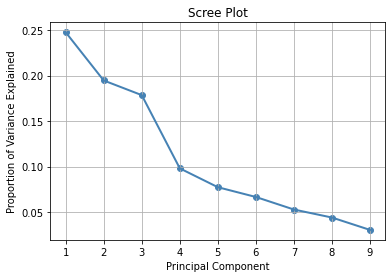

In [194]:
#Scree plot, the amount of variance explained by each component 
PC_values = np.arange(pca.n_components_) + 1
plt.scatter(PC_values, pca.explained_variance_ratio_,color='steelblue')
plt.plot(PC_values, pca.explained_variance_ratio_, linewidth=2, color='steelblue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.grid()
plt.show()

In [195]:
pca = PCA(n_components =2)
#Fit and transform the data
pca.fit(X_train_scaled)
pc_comps = pca.fit_transform(X_train_scaled)

In [209]:
principalDf = pd.DataFrame(data = pc_comps
             , columns = ['PC 1', 'PC 2'])
y_train = y_train.reset_index(drop=True)
principalDf['class'] = y_train

In [215]:
X = principalDf

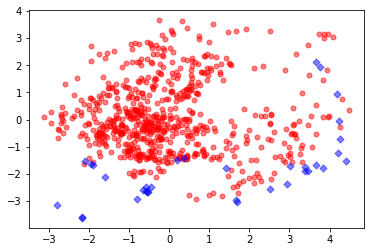

In [222]:
plt.scatter(X['PC 1'][(X['class'] == 0)],
            X['PC 2'][(X['class'] == 0)],
           marker='o',
           color='red',
           label='Majority',
           s = 5**2, alpha=0.5)
plt.scatter(X['PC 1'][(X['class'] == 1)],
            X['PC 2'][(X['class'] == 1)],
           marker='D',
           color='blue',
           label='Minority',
           s = 5**2, alpha=0.5)


In [79]:
X_train_scaled, X_test_scaled, y_train, y_test = random_under_minority (vowel_0, 'high', 1)

In [90]:
def PCA_plots(X_train_scaled, y_train):
    pca = PCA(n_components =2)
    #Fit and transform the data
    pca.fit(X_train_scaled)
    pc_comps = pca.fit_transform(X_train_scaled)
    
    X = pd.DataFrame(data = pc_comps
             , columns = ['PC 1', 'PC 2'])
    X['class'] = y_train
    X['class'] = X['class'].replace({0: 'majority', 1: 'minority'})
    X.loc[701:,'class'] = X.loc[701:]['class'].replace('minority', 'minority_new')
    
    plt.figure(figsize=(7,5))
    
    plt.scatter(X['PC 1'][(X['class'] == 'majority')],
            X['PC 2'][(X['class'] == 'majority')],
           marker='o',
           color='red',
           label='Majority',
           s = 5**2, alpha=0.5)
    plt.scatter(X['PC 1'][(X['class'] == 'minority')],
            X['PC 2'][(X['class'] == 'minority')],
           marker='D',
           color='blue',
           label='Minority',
           s = 5**2)
    plt.scatter(X['PC 1'][(X['class'] == 'minority_new')],
            X['PC 2'][(X['class'] == 'minority_new')],
           marker='D',
           color='blue',
           label='Minority - new',
           s = 5**2, alpha=0.2)
    plt.legend()
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Minority Instance Generation - MAHAKIL')
    plt.show()

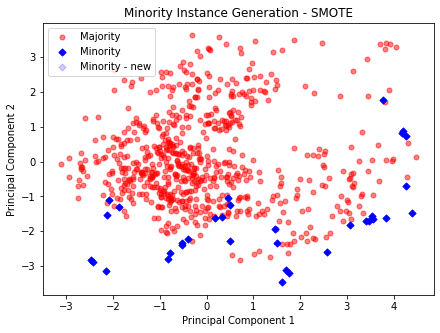

In [81]:
PCA_plots(X_train_scaled, y_train)

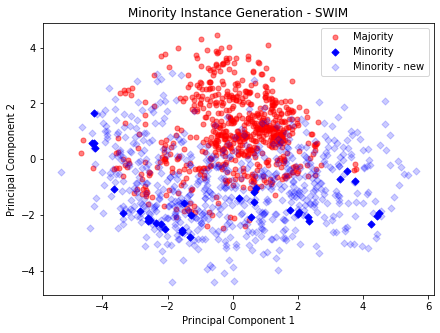

In [85]:
X_train_scaledsw, X_test_scaledsw, y_trainsw, y_testsw = SWIM_sampling(X_train_scaled, X_test_scaled, y_train, y_test)
PCA_plots(X_train_scaledsw, y_trainsw)

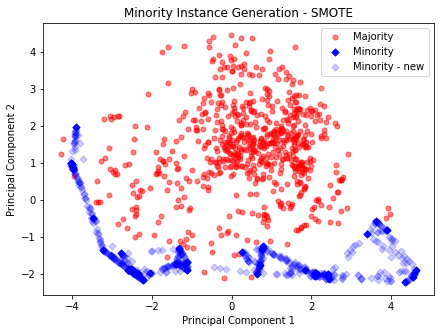

In [89]:
X_train_scaledsm, X_test_scaledsm, y_trainsm, y_testsm = SMOTE_sampling(X_train_scaled, X_test_scaled, y_train, y_test)
PCA_plots(X_train_scaledsm, y_trainsm)

sorted data
calculated distance
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
<class 'pandas.core.frame.DataFrame'>


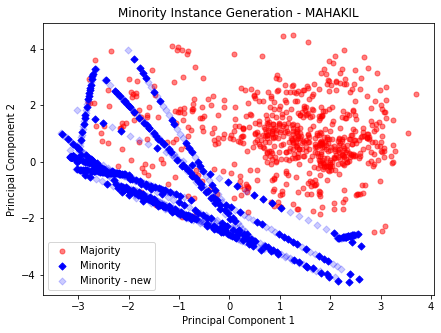

In [91]:
X_train_scaledm, X_test_scaledm, y_trainm, y_testm = MAHAKIL_sampling(X_train_scaled, X_test_scaled, y_train, y_test)
PCA_plots(X_train_scaledm, y_trainm)